In [63]:
#import bibliotecas
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [64]:
df = pd.read_csv('dadosacoes.csv',sep=',')

In [65]:
df.head() #Mostra as informações


,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [66]:
df.info() #Mostra as informações

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [67]:
df.describe() #Mostra as informações 

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [68]:
X = df[['preço ação R$','qtde cotas','valor de mercado R$ -(Bilhões)']] # selecionando as colunas que interessam para
# realizar o agrupamento

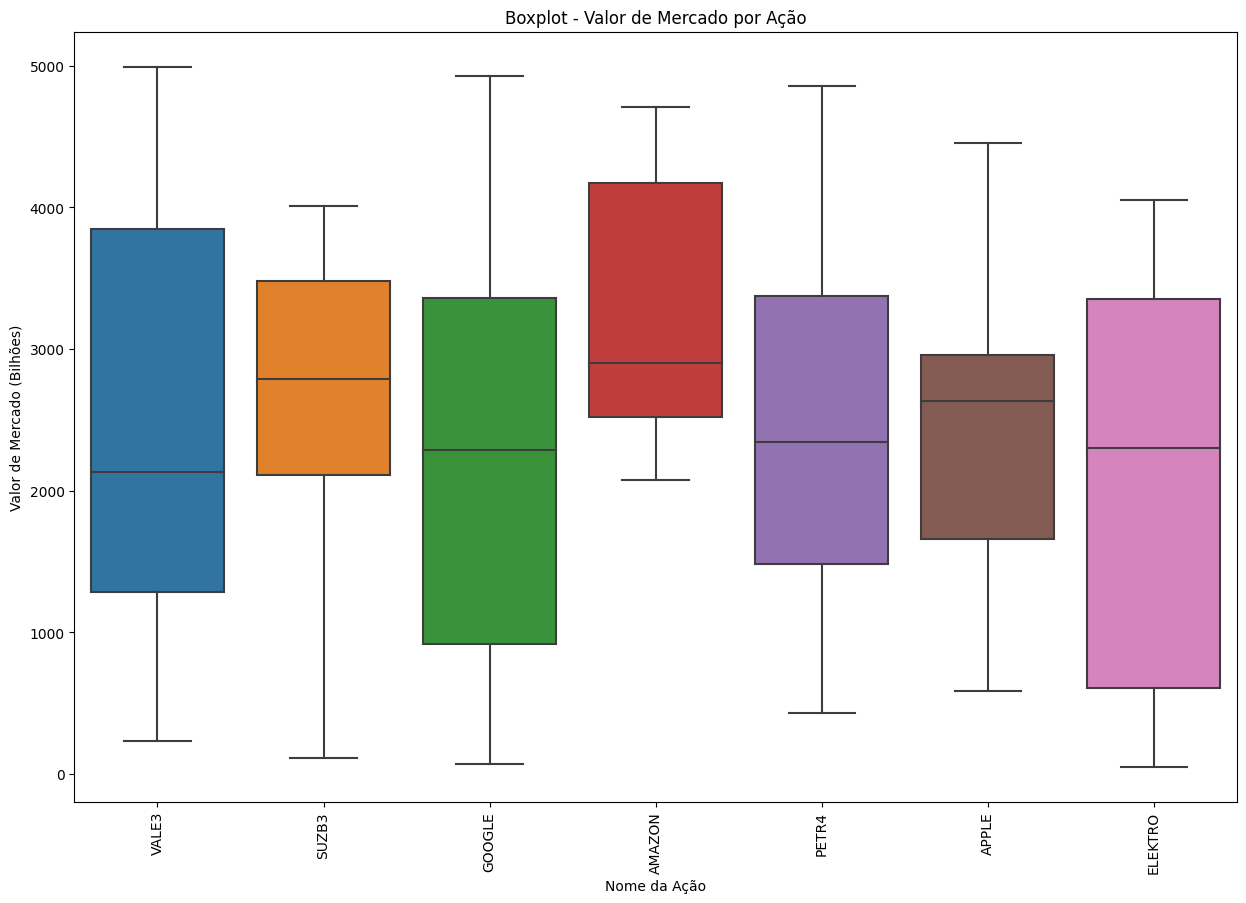

In [69]:
# Boxplot para cada ação com base no valor de mercado
plt.figure(figsize=(15, 10))
sns.boxplot(x='nome ação', y='valor de mercado R$ -(Bilhões)', data=df)
plt.title('Boxplot - Valor de Mercado por Ação')
plt.xlabel('Nome da Ação')
plt.ylabel('Valor de Mercado (Bilhões)')
plt.xticks(rotation=90) 
plt.show()



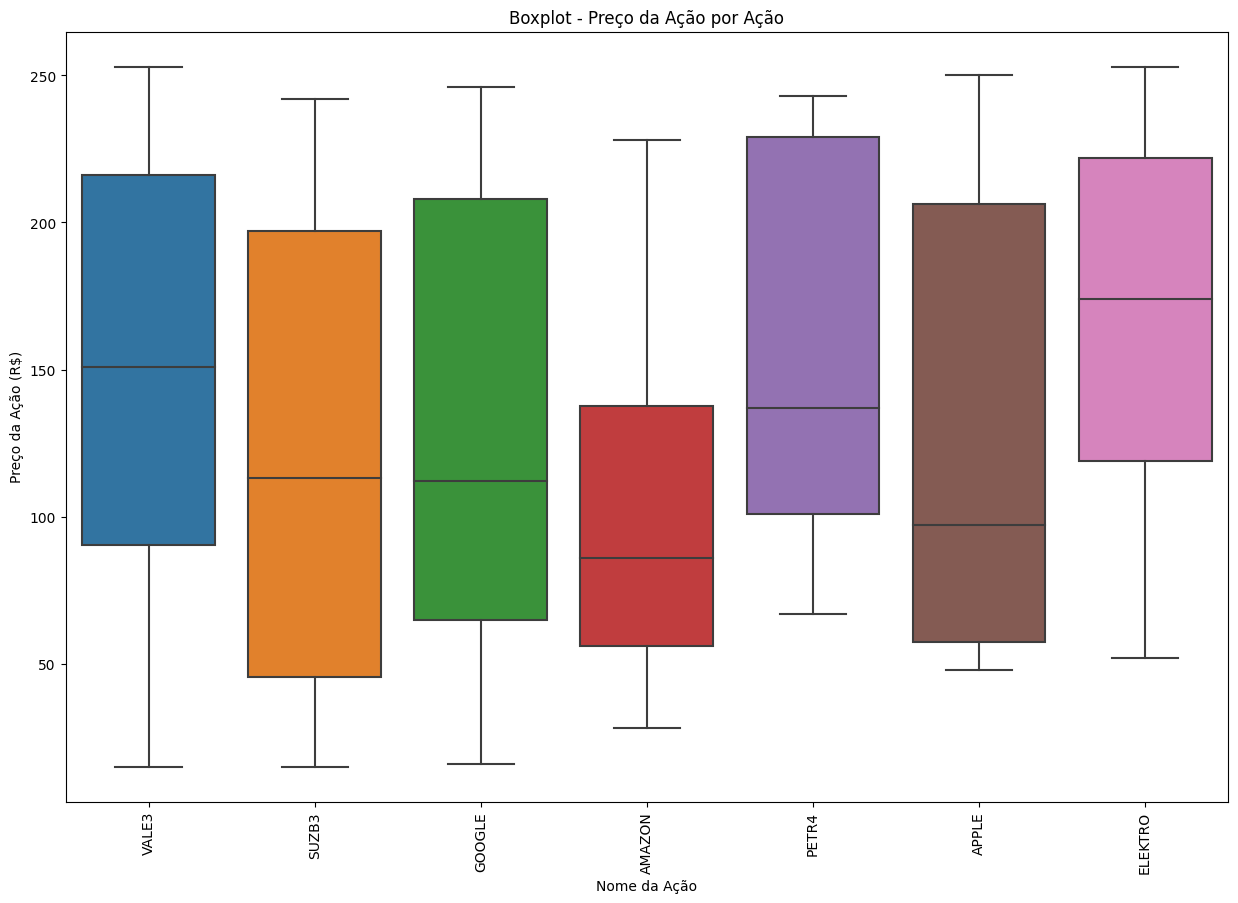

In [70]:
# Boxplot para cada ação com base no preço da ação
plt.figure(figsize=(15, 10))
sns.boxplot(x='nome ação', y='preço ação R$', data=df)
plt.title('Boxplot - Preço da Ação por Ação')
plt.xlabel('Nome da Ação')
plt.ylabel('Preço da Ação (R$)')
plt.xticks(rotation=90) 
plt.show()


In [71]:
# Executar o algoritmo K-Means com 4 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [72]:
# Adicionar os rótulos dos clusters ao DataFrame original
df['Cluster'] = kmeans.labels_

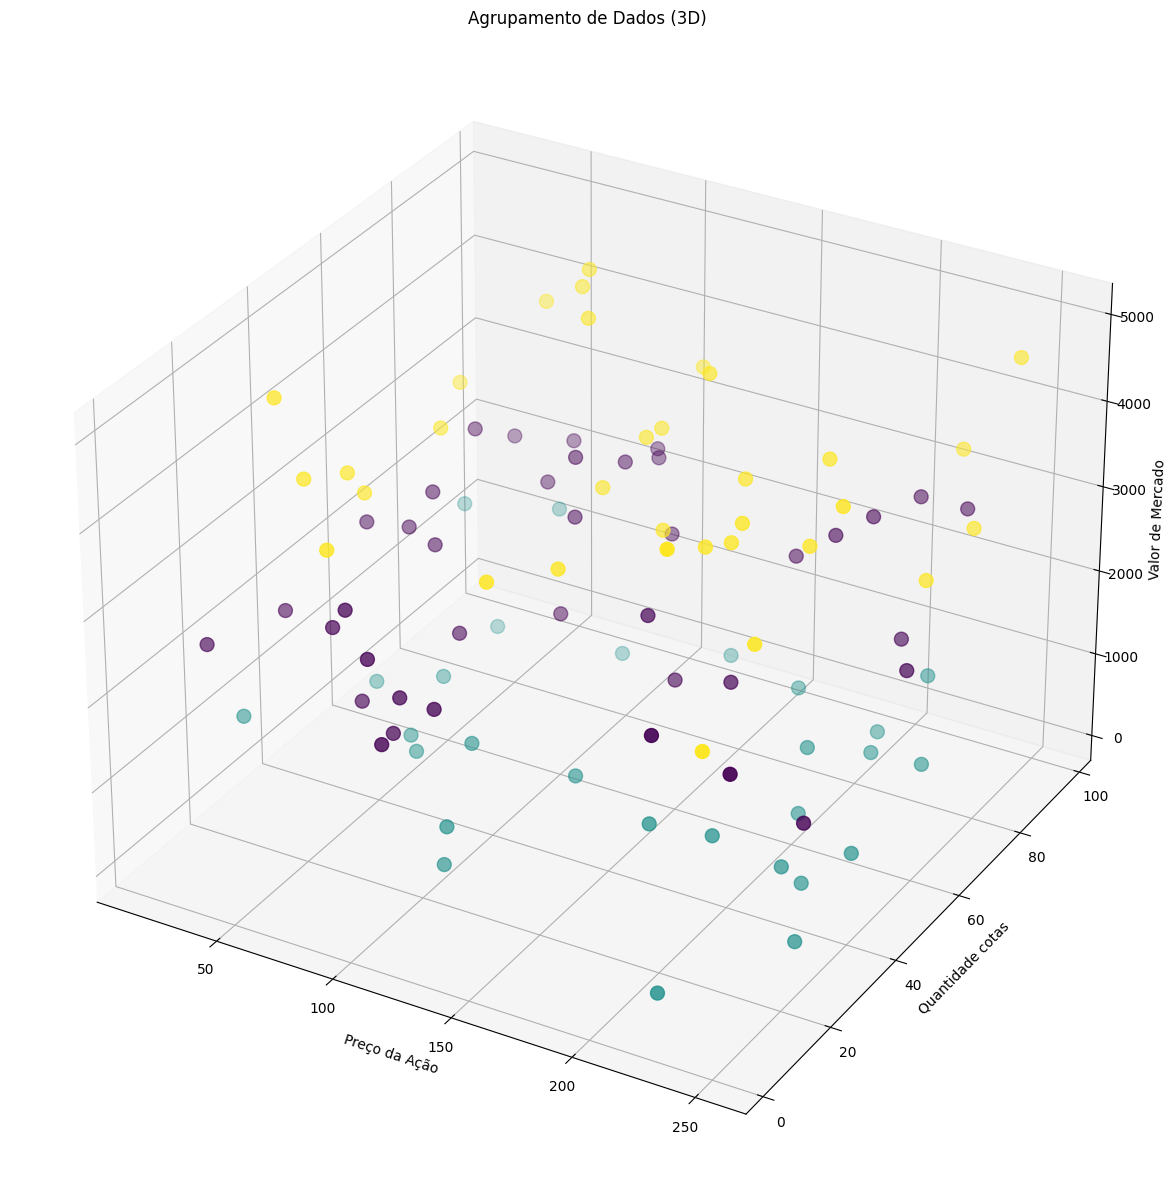

   nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
0      VALE3            194          45                            2134   
1      SUZB3             91          71                            3069   
2      SUZB3            165          41                            2815   
3      SUZB3             56          34                            3613   
4     GOOGLE            212           9                            2975   
..       ...            ...         ...                             ...   
95     SUZB3            208          78                            3035   
96     VALE3            253          60                            3263   
97    GOOGLE             99          35                             980   
98     VALE3             82          43                            1866   
99     VALE3            111          19                             230   

    Cluster  
0         0  
1         0  
2         0  
3         2  
4         0  
..      ...  
9

In [73]:
# Visualize os grupos formados em um gráfico 3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['preço ação R$'], X['qtde cotas'], X['valor de mercado R$ -(Bilhões)'], c=kmeans.labels_, s=100)
ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade cotas')
ax.set_zlabel('Valor de Mercado')

plt.title('Agrupamento de Dados (3D)')
plt.show()

# Analisar os clusters formados
print(df)

<Axes: xlabel='nome ação', ylabel='preço ação R$'>

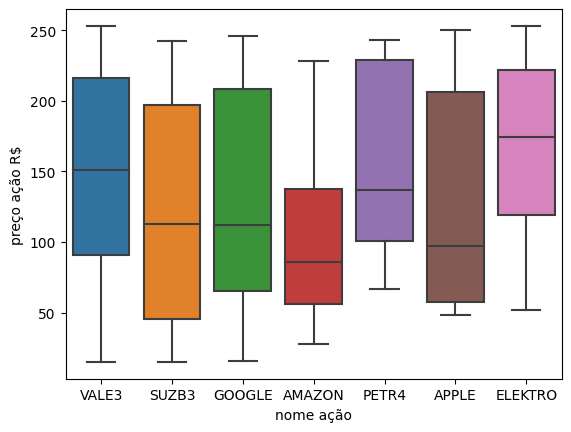

In [74]:

sns.boxplot(x=df['nome ação'],y=df['preço ação R$']) # Boxplot

In [75]:
dados_ativos = pd.get_dummies(df,columns= ['nome ação'])

In [76]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(dados_ativos)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [77]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(dados_ativos)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [78]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(dados_ativos)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [79]:

dados_ativos.head()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),Cluster,nome ação_AMAZON,nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,0,False,False,False,False,False,False,True
1,91,71,3069,0,False,False,False,False,False,True,False
2,165,41,2815,0,False,False,False,False,False,True,False
3,56,34,3613,2,False,False,False,False,False,True,False
4,212,9,2975,0,False,False,False,True,False,False,False


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

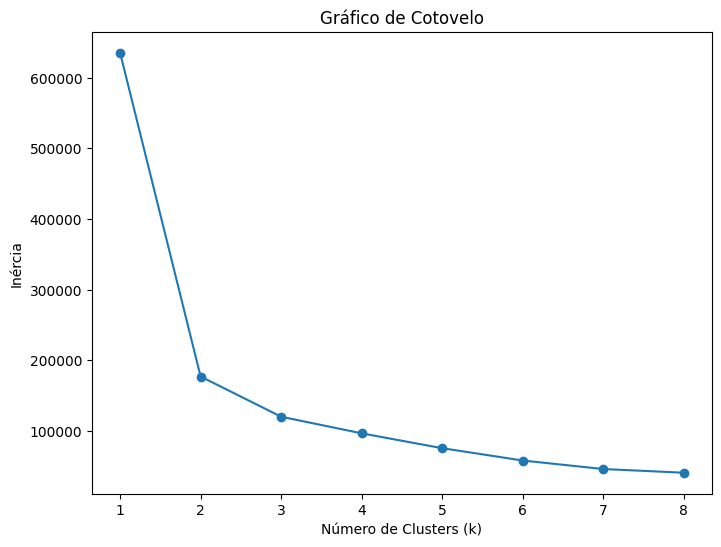

In [80]:
#Calcula a inércia para diferentes valores de k (número de clusters)
inertia = []

# Testando valores de k de 1 a 8
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X[['preço ação R$', 'qtde cotas']])
    inertia.append(kmeans.inertia_)

#Plotando o gráfico de cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 9), inertia, marker='o')
plt.title('Gráfico de Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

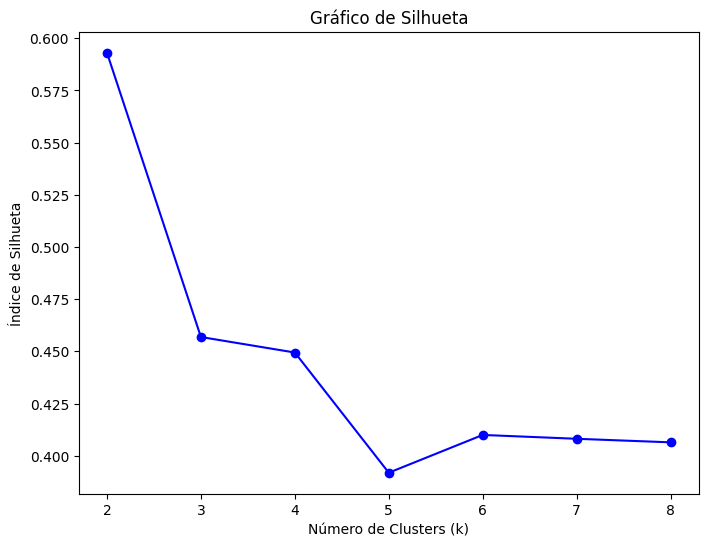

In [81]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

silhouette_scores = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X[['preço ação R$', 'qtde cotas']])
    
    # Calculando o índice de silhueta para o modelo ajustado
    score = silhouette_score(X[['preço ação R$', 'qtde cotas']], kmeans.labels_)
    silhouette_scores.append(score)

#Plotando gráfico de silhueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), silhouette_scores, marker='o', color='b')
plt.title('Gráfico de Silhueta')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silhueta')
plt.show()


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


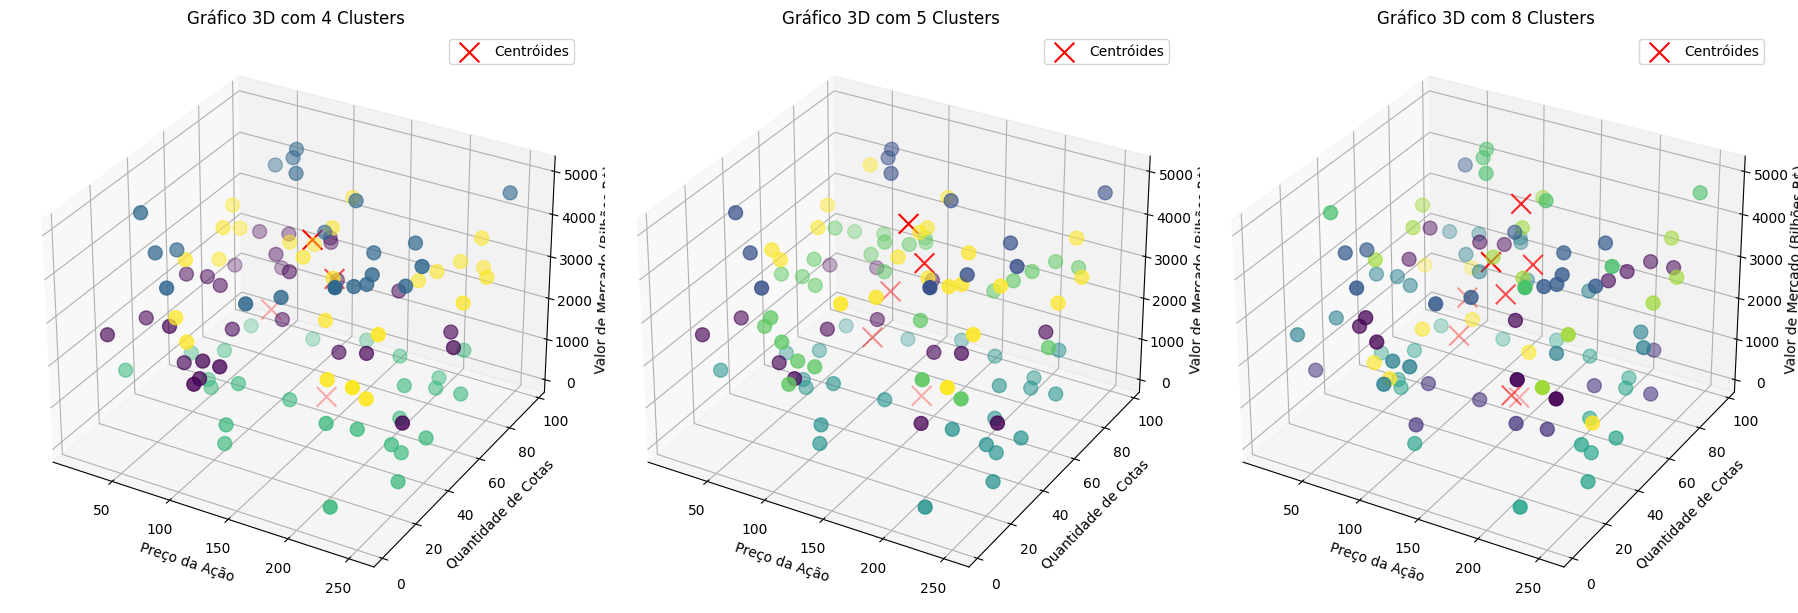

In [88]:
# Definindo o número de clusters para 4, 5 e 8
n_clusters_list = [4, 5, 8]

fig = plt.figure(figsize=(18, 12))

# Loop para plotar os clusters para cada valor de clusters
for i, n_clusters in enumerate(n_clusters_list, 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']])  # Usando as 3 variáveis

    # Criando subgráficos 3D para cada número de clusters
    ax = fig.add_subplot(2, 3, i, projection='3d')

    # Plotando os pontos de dados
    ax.scatter(X['preço ação R$'], X['qtde cotas'], X['valor de mercado R$ -(Bilhões)'], c=kmeans.labels_, s=100, cmap='viridis')

    # Marcando os centróides dos clusters com "x" vermelho
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', color='red', s=200, label='Centróides')

    ax.set_title(f'Gráfico 3D com {n_clusters} Clusters')
    ax.set_xlabel('Preço da Ação')
    ax.set_ylabel('Quantidade de Cotas')
    ax.set_zlabel('Valor de Mercado (Bilhões R$)')
    ax.legend()

plt.tight_layout()
plt.show()



c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


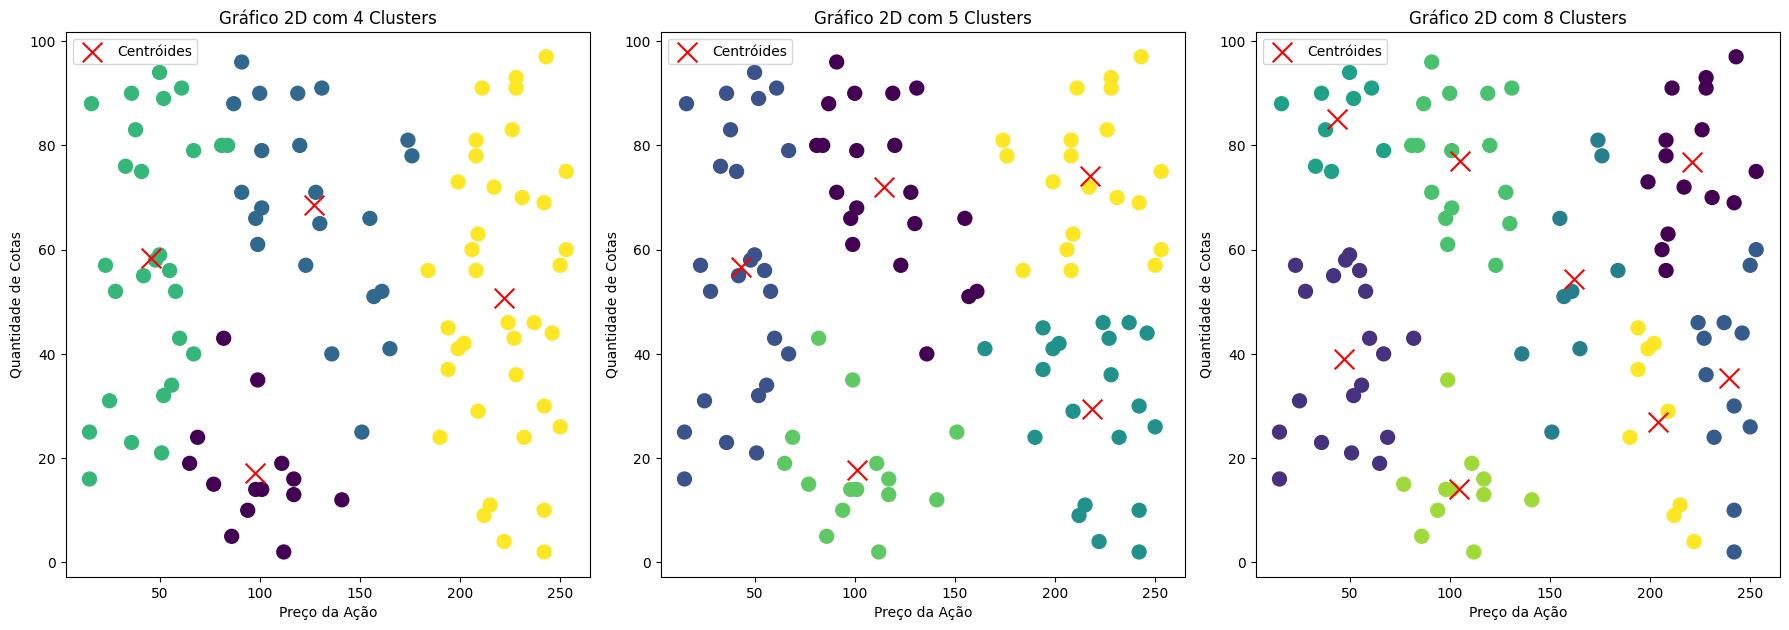

In [91]:
# Definindo o número de clusters para 4, 5 e 8
n_clusters_list = [4, 5, 8]

# Definindo o tamanho da figura para todas as visualizações
plt.figure(figsize=(18, 12))

# Loop para plotar os clusters para cada valor de clusters
for i, n_clusters in enumerate(n_clusters_list, 1):
    # Ajustando o modelo KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X[['preço ação R$', 'qtde cotas']])  # Usando apenas as duas variáveis para o gráfico 2D

    # Criando subgráficos 2D para cada número de clusters
    plt.subplot(2, 3, i)
    plt.scatter(X['preço ação R$'], X['qtde cotas'], c=kmeans.labels_, s=100, cmap='viridis')

    # Marcando os centróides dos clusters com "x" vermelho
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=200, label='Centróides')

    plt.title(f'Gráfico 2D com {n_clusters} Clusters')
    plt.xlabel('Preço da Ação')
    plt.ylabel('Quantidade de Cotas')
    plt.legend()

plt.tight_layout()
plt.show()
